<a href="https://colab.research.google.com/github/IngaBesedina/AI_ML_2/blob/main/LabWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data_path = "https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


Одиночные признаки

Количественные признаки

In [ ]:
data.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')

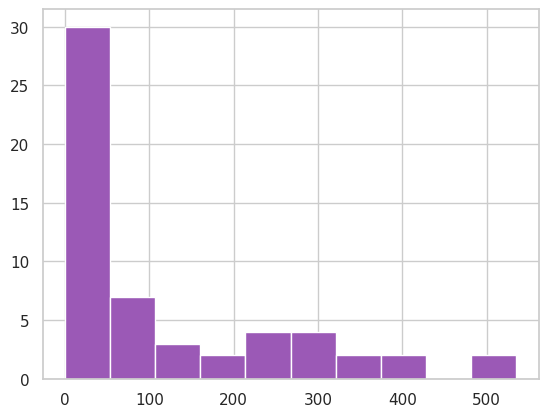

In [ ]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['fatalities_85_99'].hist();

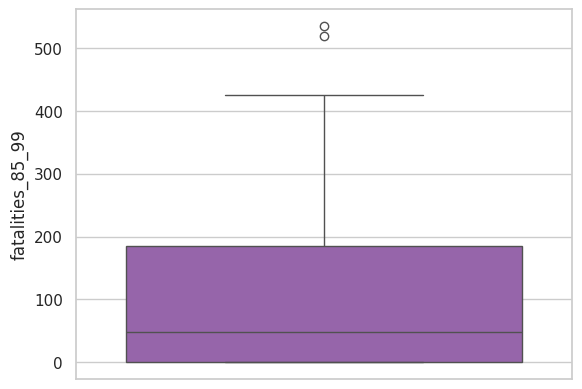

In [ ]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['fatalities_85_99']);

<ipython-input-114-f8fce428e54f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[data.airline.isin(top_data)],


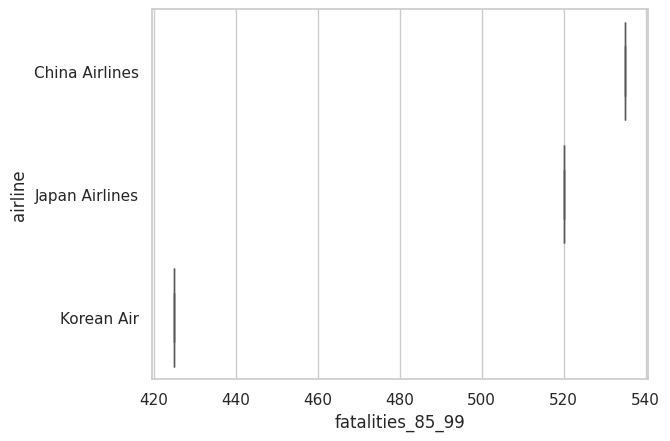

In [ ]:
top_data = data[['airline','fatalities_85_99']]
top_data = top_data.groupby('airline').sum()
top_data = top_data.sort_values('fatalities_85_99',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(data=data[data.airline.isin(top_data)],
            y='airline',
            x='fatalities_85_99',
            orient='h', palette="Set2");

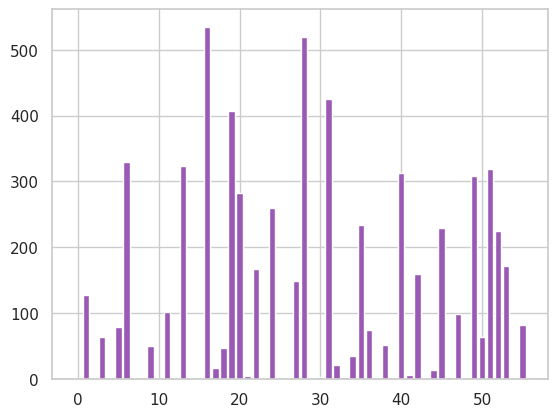

In [ ]:
plt.bar(data.index, data['fatalities_85_99'])
plt.show()

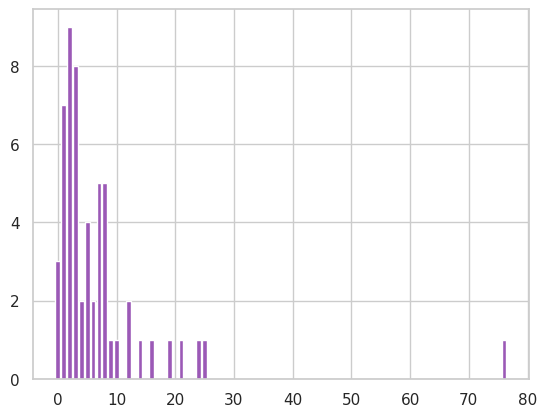

In [ ]:
hist = data['incidents_85_99'].value_counts()
plt.bar(hist.index, hist);

In [ ]:
feats=[f for f in data.columns if 'incidents' in f]
feats

['incidents_85_99', 'incidents_00_14']

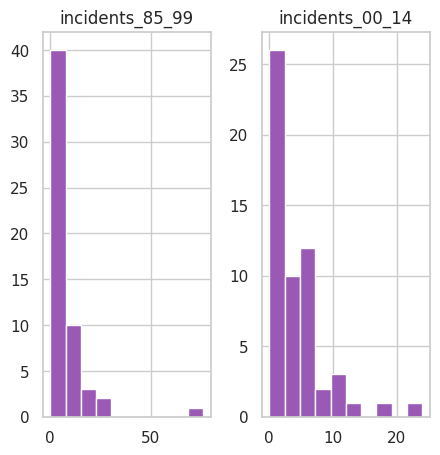

In [ ]:
data[feats].hist(figsize=(5,5));

Взаимосвязанные признаки

Количественный - количественный

In [ ]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'fatal_accidents' in f]
len(feats)

2

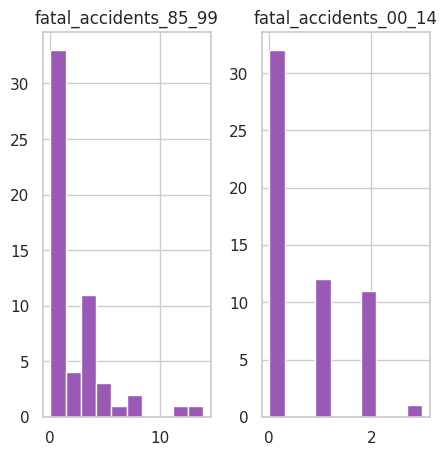

In [ ]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5,5));

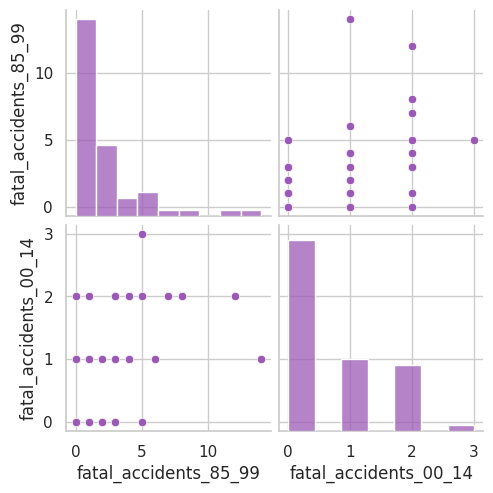

In [ ]:
sns.pairplot(data[feats]);

In [ ]:
data.corr()

<ipython-input-121-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
avail_seat_km_per_week,1.000000,0.279538,0.468300,0.209835,0.725917,0.375673,0.228484
incidents_85_99,0.279538,1.000000,0.856991,0.274394,0.403009,0.390249,0.195337
fatal_accidents_85_99,0.468300,0.856991,1.000000,0.540866,0.572923,0.498758,0.186985
fatalities_85_99,0.209835,0.274394,0.540866,1.000000,0.273696,0.228180,0.046979
incidents_00_14,0.725917,0.403009,0.572923,0.273696,1.000000,0.598071,0.282009
fatal_accidents_00_14,0.375673,0.390249,0.498758,0.228180,0.598071,1.000000,0.695864
fatalities_00_14,0.228484,0.195337,0.186985,0.046979,0.282009,0.695864,1.000000


<ipython-input-122-b9710ca2362c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap=plt.cm.PuBuGn);


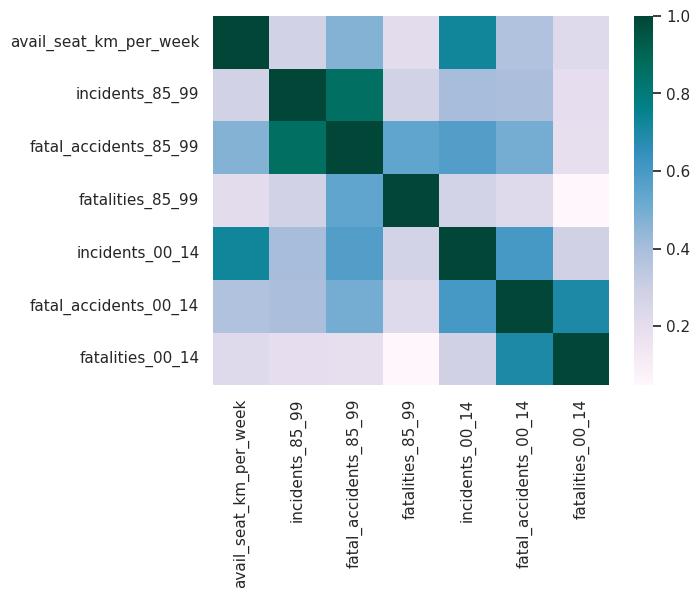

In [ ]:
sns.heatmap(data.corr(), cmap=plt.cm.PuBuGn);

In [ ]:
data_uncorr = data.drop(feats, axis=1)
data_uncorr.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatalities_85_99', 'incidents_00_14', 'fatalities_00_14'],
      dtype='object')

<ipython-input-124-f5d45c9a7e3a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_uncorr.corr(), cmap=plt.cm.rainbow);


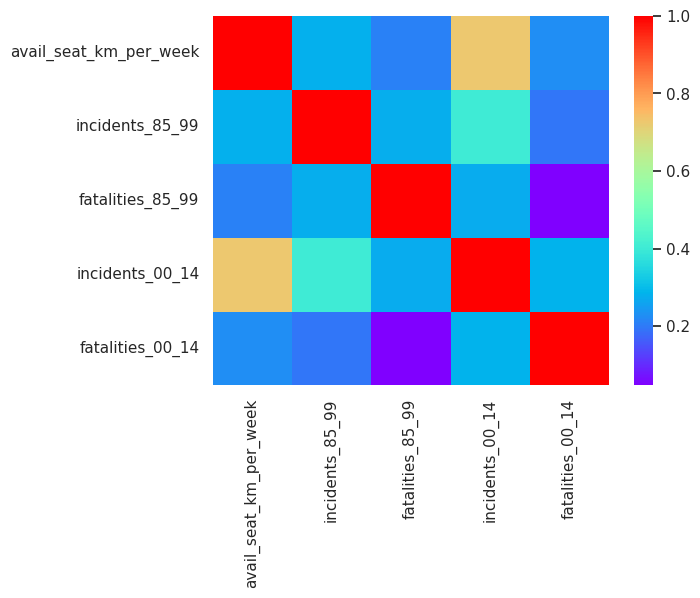

In [ ]:
sns.heatmap(data_uncorr.corr(), cmap=plt.cm.rainbow);